# Linear Regression      
#### Personal Notes

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Introduction 

Suppose that we have $ X = X_1, X_2, ..., X_p$ $\in \mathbb{R}^{p}$ with $p \in \mathbb{N}$ and we wish to predict $Y \in \mathbb{R}$ and the joint distribution between X and Y is $\mathbb{P}_{R} \left( X,Y \right)$.      
Therefore, we seek a function $f$ such that :     
$$
Y = f \left( X \right) 
$$
To determine if a function $f$ is a good candidate, we need to estimate the error and thus need a "Loss Function" $L$. The most common is the "squared error loss", i.e :    
$$
L : y,z \mapsto (y - z)^2
$$
Which leads us to the following criterion : 
$$
EPE \left( f \right) = \mathbb{E} \left[ L \left( Y ,f \left( X \right) \right) \right] = \mathbb{E} \left[ \left( Y - f \left( X \right) \right)^2 \right]  
$$
In This particular setting, the best candidate for $f$ is :  
$$
f : x \mapsto \mathbb{E} \left[ Y | X = x \right] 
$$ 
This function f is called the **regression function**.

## I - Principle of the model

Determining $f$ is in reality hard as we only have access to a finite number of data points $\mathcal{T}_{training} = (x_i,y_i)_{1 \leq N}$. Indeed, this lead to issue as by example if we used the RSS (**R**esidual **S**um of **S**quares) as a criterion to determine if a function is good enough, i.e : 
$$
RSS \left( f \right) = \sum_{i=1}^{N} \left( y_i - f \left( x_i \right) \right) 
$$
What we clearly understand is that each function going exactly through the points at $y_i$ would be a perfect fit. Therefore, to solve our problem we are going to make the following assumptions : 
- The relationship between X and Y is defined as the following : 
$$
Y = f \left( X \right) + \varepsilon \quad \varepsilon \sim \mathcal{N} \left( 0, \sigma^2 \right) \quad \text{and} \quad \varepsilon \perp\!\!\!\!\perp X
$$  
This assumption means that the conditionnal distribution $\mathbb{P}_{R} \left( X,Y \right)$ depends on $X$ only through $f \left( x \right)$ 
- The underlying structure of the data is the following : 
$$
f(X) = \beta_0 + \sum_{j=1}^{p} \beta_j X_j
$$
Where the coefficients $\left( \beta \right)_{1 \leq i \leq p}$ are found by solving the following optimization problem : 
$$ 
\begin{align*}
\beta^{\star} &= argmin_{\beta \in \mathbb{R}^{p+1}} RSS \left( \beta \right) \\
    &= argmin_{\beta \in \mathbb{R}^{p+1}} \left( \sum_{i=1}^{N} \left( y_i - f \left( x_i \right) \right)^2  \right)\\
    &= argmin_{\beta \in \mathbb{R}^{p+1}} \left( \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_p \right)^2 \right)
\end{align*}
$$
What we can remark is that by defining the structure of our model, we went from a class of function to a class of parameters. Therefore, now identifying the good function $f$ is the same as identifying the coefficients $\beta_i$. Therefore, in the following we will use $f$ and $\beta$ indistinctively.

In this setting the best coefficients $\beta$ can be found analytically : 
$$
\begin{equation*}
    \beta^{\star} = \left( X^{T} X \right)^{-1} X^{T} Y
\end{equation*}
$$

## II - Penalization methods 

Earlier we used the RSS criterion to determine if a function f fitted or not. However, the issue is that we would have a good fit on the training set but poor results on the test set. Therefore, we understand that our criterion is not the most adapted, we need to somehow modify it. One of the way is to add a penalty term, i.e : we don't use **RSS** but **PRSS** (**P**enalised **R**esidual **S**um of **S**quares) : 
$$
PRSS \left( f , \lambda \right) = RSS \left( f \right) + \lambda J \left( f \right) 
$$ 
Where J denotes the penalization.         
In fact this formulation is the Lagrangian one. A penalization means that we put some constraints. In our case our objective function is the RSS, and we selected a $t \in \mathbb{R}^{+}$ such that our constrained problem is : 
$$
\begin{align*}
    &\inf \left( \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_p \right)^2 \right) \\
    &\text{s.t : } J \left( \beta \right) \leq t 
\end{align*}
$$

### Lasso Regression 

The **LASSO** ( **L**east **A**bsolute **S**hrinkage and **S**election **O**perator ) Regression is a regularization method where the function $J$ is the $L_1$ norm. In our case we apply it to the linear regression thus on the coefficients $ \left( \beta_i \right)_{1 \leq i \leq p}$ which gives : 
$$
PRSS \left( \beta, \lambda \right) = RSS \left( \beta \right) + \lambda || \beta ||_{1}
$$

### Ridge Regression 

The **RIDGE** Regression is a regularization method where the function $J$ is the $L_2$ norm. In our case we apply it to the linear regression thus on the coefficients $ \left( \beta_i \right)_{1 \leq i \leq p}$ which gives : 
$$
PRSS \left( \beta, \lambda \right) = RSS \left( \beta \right) + \lambda || \beta ||_{2}^{2}
$$

In [72]:
X1 = np.random.normal(scale = 1, size = 200)
Z = np.random.normal(scale = 1, size = 200)

rho_arr = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999, 0.9999,0.99999, 0.9999999]
cond_arr = []
for rho in rho_arr:
    X2 = rho*X1 + (1-rho)*np.random.normal(scale = 1, size = 200)
    df = pd.DataFrame({"X1": X1, "X2": X2})
    X = df.values
    cond_arr.append(np.linalg.cond(np.dot(X.T,X)))

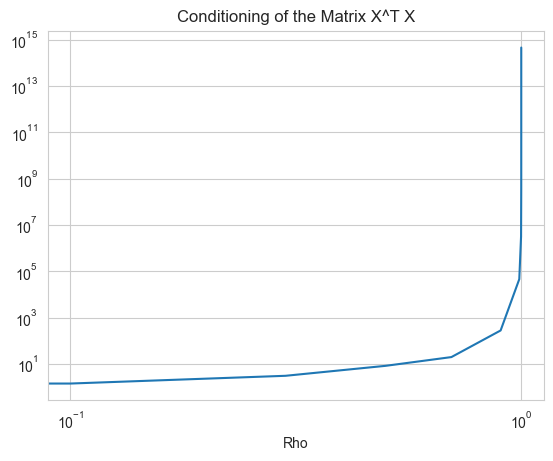

In [75]:
plt.plot(rho_arr, cond_arr)
plt.xscale("log"); plt.yscale("log")
plt.title("Conditioning of the Matrix X^T X")
plt.xlabel("Rho")
plt.show()

In [63]:
dotted = np.dot(X.T,X) 
np.linalg.cond(dotted)

3810779589345.704

### Bridge Regression 

### Elastic-Net

# Sources

[1] Hastie T., Tibshirani R., Friedman J., "Elements of Statistical Learning", 2009         
[2] Bishop C., "Pattern recognition and machine learning", 2006